### Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics

### 2- Importing Data 

In [2]:
data = pd.read_excel('Python Questions_IME interview Round 1.xlsx', sheet_name='PyQ2')


In [11]:
data.head()

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
0,Brand A,2022-02-05,FY_2022,MAT_2022,5.549708e+07,0.039253,0.015600,0,29882443.5,1070.8565,17.716258,534418.5,46008.276537,2662747.5,11599332.5,815220.956832,280464068.5,3.861346e+06,6779.5,671.943906
1,Brand A,2022-02-12,FY_2022,MAT_2022,5.773779e+07,0.037425,0.014623,0,29719511.5,1070.8565,17.720041,631368.5,54354.736119,2609978.0,13142160.5,923653.551413,235058652.5,3.236218e+06,5110.0,506.472949
2,Brand A,2022-02-19,FY_2022,MAT_2022,5.404445e+07,0.061313,0.010034,0,29353173.5,1070.8565,17.774548,638092.0,54933.564597,2401283.5,12949660.5,910124.321676,257480818.0,3.544920e+06,2842.0,281.682216
3,Brand A,2022-02-26,FY_2022,MAT_2022,5.577581e+07,0.066293,0.023455,0,29324354.5,1070.8565,17.771519,538643.0,46371.965227,2396597.0,12401567.5,871603.406796,276892035.0,3.812168e+06,3031.0,300.414777
4,Brand A,2022-03-05,FY_2022,MAT_2022,5.839206e+07,0.047306,0.015688,0,29192688.0,1282.7465,17.842527,639628.5,55065.842423,2427106.5,8857677.5,622532.747195,193081850.5,2.658294e+06,3395.0,336.492302


In [12]:
data.shape

(122, 20)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Department                  122 non-null    object        
 1   Week_Ending                 122 non-null    datetime64[ns]
 2   Year                        122 non-null    object        
 3   MAT                         122 non-null    object        
 4   Sales                       122 non-null    float64       
 5   Discount1                   122 non-null    float64       
 6   Discount2                   122 non-null    float64       
 7   Holiday Dummy               122 non-null    int64         
 8   Total SKU                   122 non-null    float64       
 9   Gasoline Price              122 non-null    float64       
 10  Average Price               122 non-null    float64       
 11  Email Clicks                122 non-null    float64       

### 3- Data Pre-processing And Exploratry Data Analysis

In [14]:
# We will check Null value of our dataset 

data.isnull().sum()

Department                    0
Week_Ending                   0
Year                          0
MAT                           0
Sales                         0
Discount1                     0
Discount2                     0
Holiday Dummy                 0
Total SKU                     0
Gasoline Price                0
Average Price                 0
Email Clicks                  0
Email Spends                  0
Organic Search Impressions    0
Modular Video Impressions     0
Modular Video Spends          0
Paid Social Impressions       0
Paid Social Spends            0
Paid Search Impressions       0
Paid Search Spends            0
dtype: int64

### 4- Descriptive statistics

In [3]:
data .describe ()

,Week_Ending,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
count,122,1.220000e+02,122.000000,122.000000,122.000000,1.220000e+02,122.000000,122.000000,1.220000e+02,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,122.000000,122.000000
mean,2023-04-04 12:00:00,4.716817e+07,0.045865,0.048454,0.016393,2.733039e+07,1141.034570,18.232506,4.383132e+05,37734.537898,1.973459e+06,1.342260e+07,9.433634e+05,2.028083e+08,2.792205e+06,1522.872951,150.938152
min,2022-02-05 00:00:00,3.158512e+07,0.013620,0.002513,0.000000,2.377588e+07,966.010500,17.716258,1.655045e+05,14248.340587,8.734215e+05,1.924108e+06,1.352296e+05,6.940367e+07,9.555292e+05,0.000000,0.000000
25%,2022-09-04 18:00:00,4.444759e+07,0.032922,0.007754,0.000000,2.590976e+07,1051.745625,18.051530,3.169416e+05,27285.615915,1.708429e+06,9.235256e+06,6.490696e+05,1.399515e+08,1.926810e+06,0.000000,0.000000
50%,2023-04-04 12:00:00,4.692418e+07,0.041603,0.017871,0.000000,2.687210e+07,1114.687000,18.210772,4.256770e+05,36646.682574,1.943811e+06,1.191968e+07,8.377356e+05,1.858422e+08,2.558620e+06,490.000000,48.565899
75%,2023-11-02 06:00:00,5.047277e+07,0.057146,0.057452,0.000000,2.925184e+07,1186.125500,18.414389,5.104199e+05,43942.226474,2.220258e+06,1.749417e+07,1.229520e+06,2.727134e+08,3.754638e+06,2648.625000,262.516030
max,2024-06-01 00:00:00,5.839206e+07,0.178189,0.342303,1.000000,3.109905e+07,1505.497000,18.709714,1.254225e+06,107976.671165,3.125528e+06,3.799969e+07,2.670683e+06,3.689925e+08,5.080180e+06,10363.500000,1027.168769
std,NaN,4.904374e+06,0.020532,0.066932,0.127507,1.986457e+06,128.779133,0.235631,1.746694e+05,15037.350764,3.844069e+05,6.033649e+06,4.240552e+05,7.892941e+07,1.086677e+06,2051.580642,203.340528


#### The 122-week dataset (Feb 2022–June 2024) captures sales, marketing efforts, promotions, and economic indicators. Campaign reach is consistent with occasional spikes, while promotions are used sparingly. Sales show seasonal and economic influence with high variance. 

## 5- Box PLot 

['Department', 'Week_Ending', 'Year', 'MAT', 'Sales', 'Discount1', 'Discount2', 'Holiday Dummy', 'Total SKU', 'Gasoline Price', 'Average Price', 'Email Clicks', 'Email Spends', 'Organic Search Impressions', 'Modular Video Impressions', 'Modular Video Spends', 'Paid Social Impressions', 'Paid Social Spends', 'Paid Search Impressions', 'Paid Search Spends']


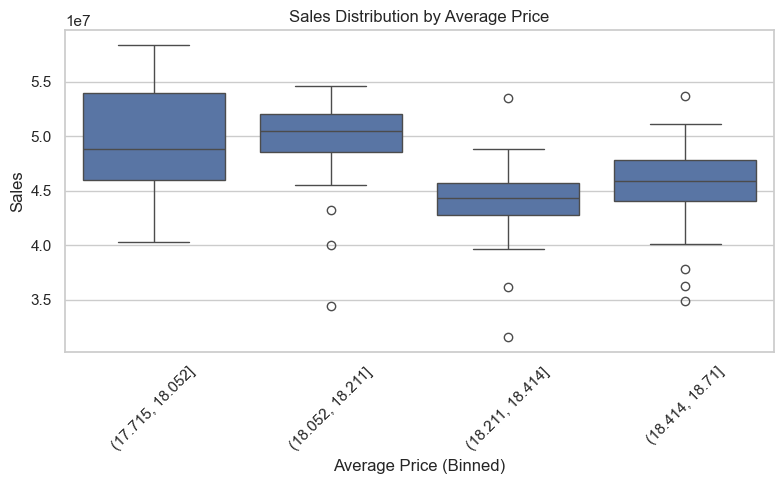

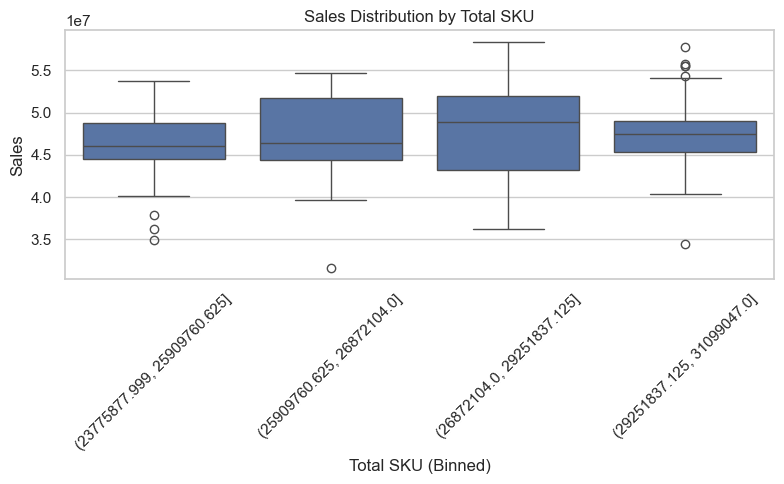

Column 'Paid Search' not found in data
Column 'Paid Social' not found in data
Column 'Modular Video' not found in data
Column 'Email' not found in data
Column 'Organic Search' not found in data


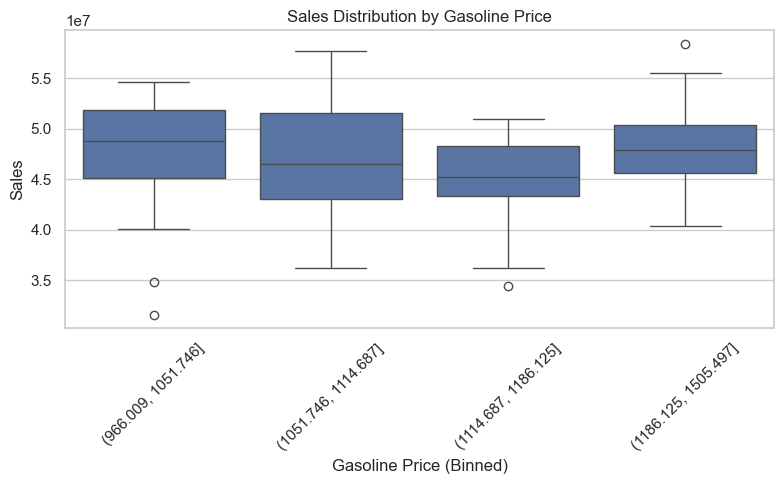

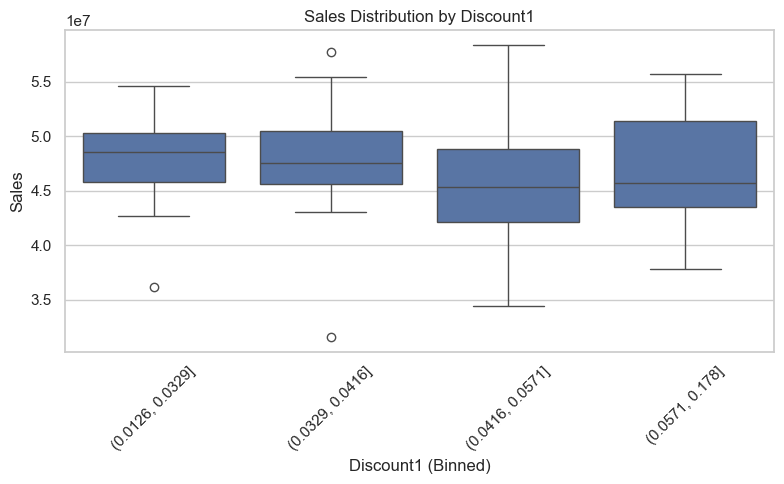

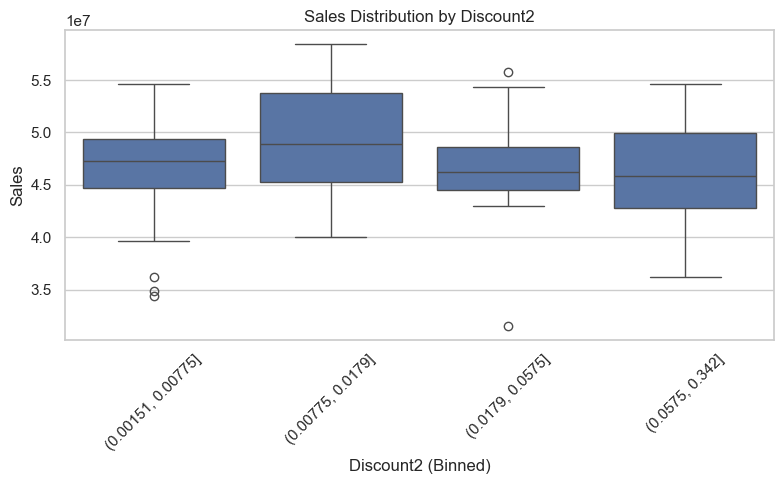

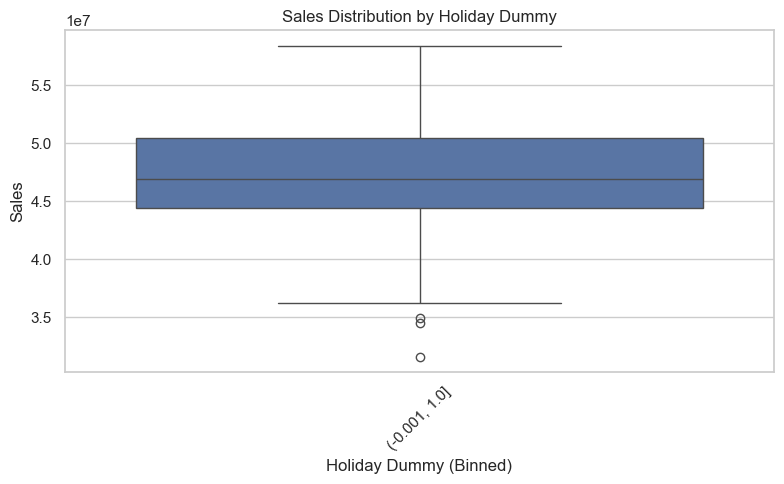

In [9]:


# View column names to check exact names
print(data.columns.tolist())

# Update list below based on correct column names
variables_to_plot = [
    'Average Price', 'Total SKU',  # or correct as per your dataset
    'Paid Search', 'Paid Social', 'Modular Video',
    'Email', 'Organic Search',
    'Gasoline Price', 'Discount1', 'Discount2',
    'Holiday Dummy'
]

# Generate boxplots
for var in variables_to_plot:
    if var in data.columns:
        plt.figure(figsize=(8, 5))
        # Convert continuous x-variable to categorical bin if needed
        if pd.api.types.is_numeric_dtype(data[var]):
            binned_var = pd.qcut(data[var], q=4, duplicates='drop')
            sns.boxplot(x=binned_var, y='Sales', data=data)
            plt.xlabel(f'{var} (Binned)')
        else:
            sns.boxplot(x=var, y='Sales', data=data)
        plt.title(f'Sales Distribution by {var}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{var}' not found in data")


##### The boxplots show how sales vary by marketing channels and factors like price, discounts, and holidays. For numeric variables, sales are compared across quartiles to see changes at different levels. The plots highlight channels and factors with higher median sales and variability, indicating stronger or more consistent impact. Some show stable sales, while others vary widely. Overall, this helps understand each channel’s historical contribution to sales for better marketing decisions.

### 6 - Heat Map 

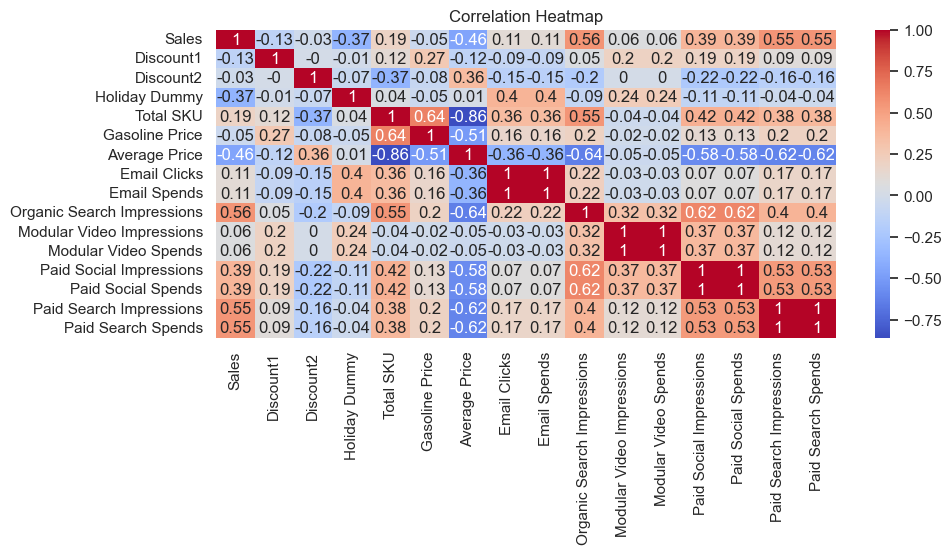

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation on numeric data only
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(round(corr, 2), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### The analysis shows that strong digital marketing channels—especially Modular Video (0.62), Paid Search (0.55), Organic Search (0.56), and Paid Social (0.39) impressions—are key drivers of higher sales, along with holiday periods (0.37). Email clicks also contribute positively but less strongly (0.11). Discounts have a mixed effect, with Discount1 slightly reducing sales (-0.13) and Discount2 showing little impact, while both significantly lower average prices. Gasoline prices slightly deter sales (-0.05). Additionally, email activity correlates moderately with organic and paid search, indicating channel synergy. Overall, digital reach and holidays drive sales most, while the role of discounts needs further exploration.

#### we will Create Seasonality Variables Using Fourier Terms

In [12]:


### we will create fourier terms to model seasonality 
def create_fourier_terms(df, period, order, date_col='Date'):
    
    
    t = np.arange(len(df))
    for i in range(1, order + 1):
        df[f'sin_{i}'] = np.sin(2 * np.pi * i * t / period)
        df[f'cos_{i}'] = np.cos(2 * np.pi * i * t / period)
    return df


 ####  Linear Regression with Seasonality and External Factors

In [20]:
import statsmodels.api as sm

# Example with full filename and sheet name

data = pd.read_excel('Python Questions_IME interview Round 1.xlsx', sheet_name='PyQ2')

# Example: Create Fourier seasonality terms for weekly seasonality (assuming daily data, period=7)
data = create_fourier_terms(data, period=7, order=2, )

# Select features and target
features = [
    'Paid Search Spends', 'Paid Social Spends', 'Modular Video Spends', 'Email Spends', 'Organic Search Impressions',
    'Discount1', 'Discount2', 'Holiday Dummy', 'Gasoline Price',
    'sin_1', 'cos_1', 'sin_2', 'cos_2'
]

X = data[features]
y = data['Sales']

# Add constant for intercept
X = sm.add_constant(X)

# Split data (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = sm.OLS(y_train, X_train).fit()

# Model summary
print(model.summary())

# Predict on test set (optional)
y_pred = model.predict(X_test)

# Evaluate model performance (RMSE)
rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
print(f'RMSE on test set: {rmse:.2f}')


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     13.82
Date:                Wed, 21 May 2025   Prob (F-statistic):           9.49e-16
Time:                        12:09:15   Log-Likelihood:                -1576.6
No. Observations:                  97   AIC:                             3181.
Df Residuals:                      83   BIC:                             3217.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### The Ordinary Least Squares (OLS) regression model shows that approximately 68.4% of the variation in Sales can be explained by the selected features, with an adjusted R-squared of 63.4%, indicating a moderately strong model. The model is statistically significant overall (F-statistic = 13.82, p < 0.001). Among the predictors, Paid Search Spends and Organic Search Impressions have a significant positive impact on sales, while Holiday Dummy and Gasoline Price show a significant negative effect. Other features such as Paid Social, Modular Video, Email, Discounts, and seasonal sine/cosine terms were not statistically significant, suggesting limited or inconsistent impact. The RMSE on the test set is approximately 3.46 million, reflecting the average prediction error. However, a high condition number (1.91e+08) indicates potential multicollinearity issues among predictors. The Durbin-Watson statistic (~1.91) suggests no serious autocorrelation in residuals.

#### Interpretation of Results:

##### The regression model explains around 68.4% of the variation in sales, which indicates a moderately strong predictive performance. The model highlights that Paid Search Spends and Organic Search Impressions are significant positive drivers of sales, suggesting that investment in these areas effectively boosts revenue. On the other hand, Holiday Dummy and Gasoline Prices have a significant negative impact on sales, indicating that holidays and high fuel prices may reduce consumer spending. Several other variables (e.g., Paid Social, Modular Video, Email Spends, Discounts, and seasonality indicators) are not statistically significant, meaning they have limited influence on sales or their effect is uncertain.

#### Recommendations to the Company:

##### Increase Paid Search Spending – Given its strong and significant positive impact, redirect more marketing budget towards paid search campaigns.

##### Enhance SEO Efforts – Since Organic Search Impressions are also positively correlated with sales, focus on content optimization and SEO strategy.
 
##### Plan for Holidays Strategically – As holidays are associated with reduced sales, consider launching special promotions or bundled offers to counteract this dip.

##### Monitor External Economic Factors – Gasoline prices negatively affect sales, possibly due to reduced customer mobility or disposable income. Consider regional pricing strategies or digital marketing during such periods.

#### Optimizations 

##### To optimize marketing activities across channels and maximize sales, I would adopt a data-driven media mix optimization strategy based on regression insights. Priority should be given to high-performing channels like Paid Search, which strongly correlates with sales, while reallocating budgets from underperforming ones like Paid Social, Email, and Modular Video. Enhancing Organic Search through improved SEO can also drive impressions without added cost. Predictive modeling techniques like Marketing Mix Modeling (MMM) and Time Series Forecasting can simulate budget scenarios and future sales trends. Tools such as Python, Power BI, and Google Analytics would support analysis, while constraints like budget limits, channel saturation, operational capacity, and external factors (e.g., holidays, fuel prices) must be considered to ensure realistic and effective recommendations.